In [1]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import rasterio
import numpy as np
import datetime as dt
from rasterstats import zonal_stats

In [4]:
#Load Data
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\geospatial_internship\\datasets')
telangana_shape = gpd.read_file('telangana_shapefile.geojson')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
one_km_grid = gpd.read_file('telangana_1km_grid.geojson')

In [5]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Landuse_Analysis')


In [18]:
tiff = '01-01-2019.tif'
lulc = rasterio.open(tiff, mode = 'r')
lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = lulc.transform

cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}
one_km_grid['category'] = 0

test = zonal_stats(one_km_grid.geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, stats = 'majority', categorical=True, category_map = cmap, all_touched = True)

one_km_grid['land use'] = None

for i in range(0, len(test)):
    one_km_grid['land use'].iloc[i] = test[i]['properties']['majority']

one_km_grid['land use cat'] = None

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyError: None

In [19]:
for i in range(0, len(test)):
    try:
        one_km_grid['land use cat'].iloc[i] = cmap[one_km_grid['land use'].iloc[i]]
    except:
        print('')

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
len(one_km_grid[one_km_grid['land use cat']=='Crops'])/len(one_km_grid)*100

65.14058753723572

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-26-42a843150b91>:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  one_km_grid_geo = gpd.GeoDataFrame(one_km_grid,geometry = one_km_grid.geometry, crs = {'init': 'epsg:4326'})


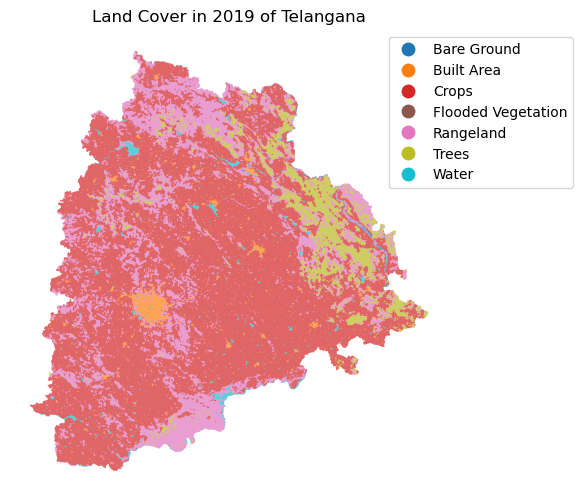

In [26]:

one_km_grid_geo = gpd.GeoDataFrame(one_km_grid,geometry = one_km_grid.geometry, crs = {'init': 'epsg:4326'}) 
fig, ax = plt.subplots(1, figsize = (12, 6))
one_km_grid_geo.plot(ax=ax, column = 'land use cat', legend = True)
plt.title('Land Cover in 2019 of Telangana')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.1,0.8, 0.2, 0.2))
plt.axis('off')
plt.show()